<a href="https://colab.research.google.com/github/IvanEFibiger/BDyML/blob/main/Laboratorio_II_Clasificador_Canciones_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar Librerías

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import learning_curve

#Importar Dataset

In [4]:
#importar el dataset
data = pd.read_csv('/content/drive/MyDrive/Canciones_Spotify.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#En esta sección se vizualizan las características del dataset






In [5]:
# Calcular la forma del dataset
n_samples, n_features = data.shape

# Calcular el número de muestras
print("Número de muestras en el dataset:", n_samples)

# Calcular el número de características
print("Número de características en el dataset:", n_features)

# Calcular la distribución de etiquetas
counts = np.bincount(data['target'])

# Imprimir la distribución de clases
print("Balance de los datos:")
for i, count in enumerate(counts):
    print(f"Clase {i}: {count}")

Número de muestras en el dataset: 2017
Número de características en el dataset: 17
Balance de los datos:
Clase 0: 997
Clase 1: 1020


##Comparamos mediante un gráfico de densidad las características del dataset, en función del 'target' para tener una representación visual de los datos

<ipython-input-6-f0627a48f5b3>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_class_0[feature], label='target 0', shade=True)
<ipython-input-6-f0627a48f5b3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_class_1[feature], label='target 1', shade=True)
<ipython-input-6-f0627a48f5b3>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_class_0[feature], label='target 0', shade=True)
<ipython-input-6-f0627a48f5b3>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_class_1[feature]

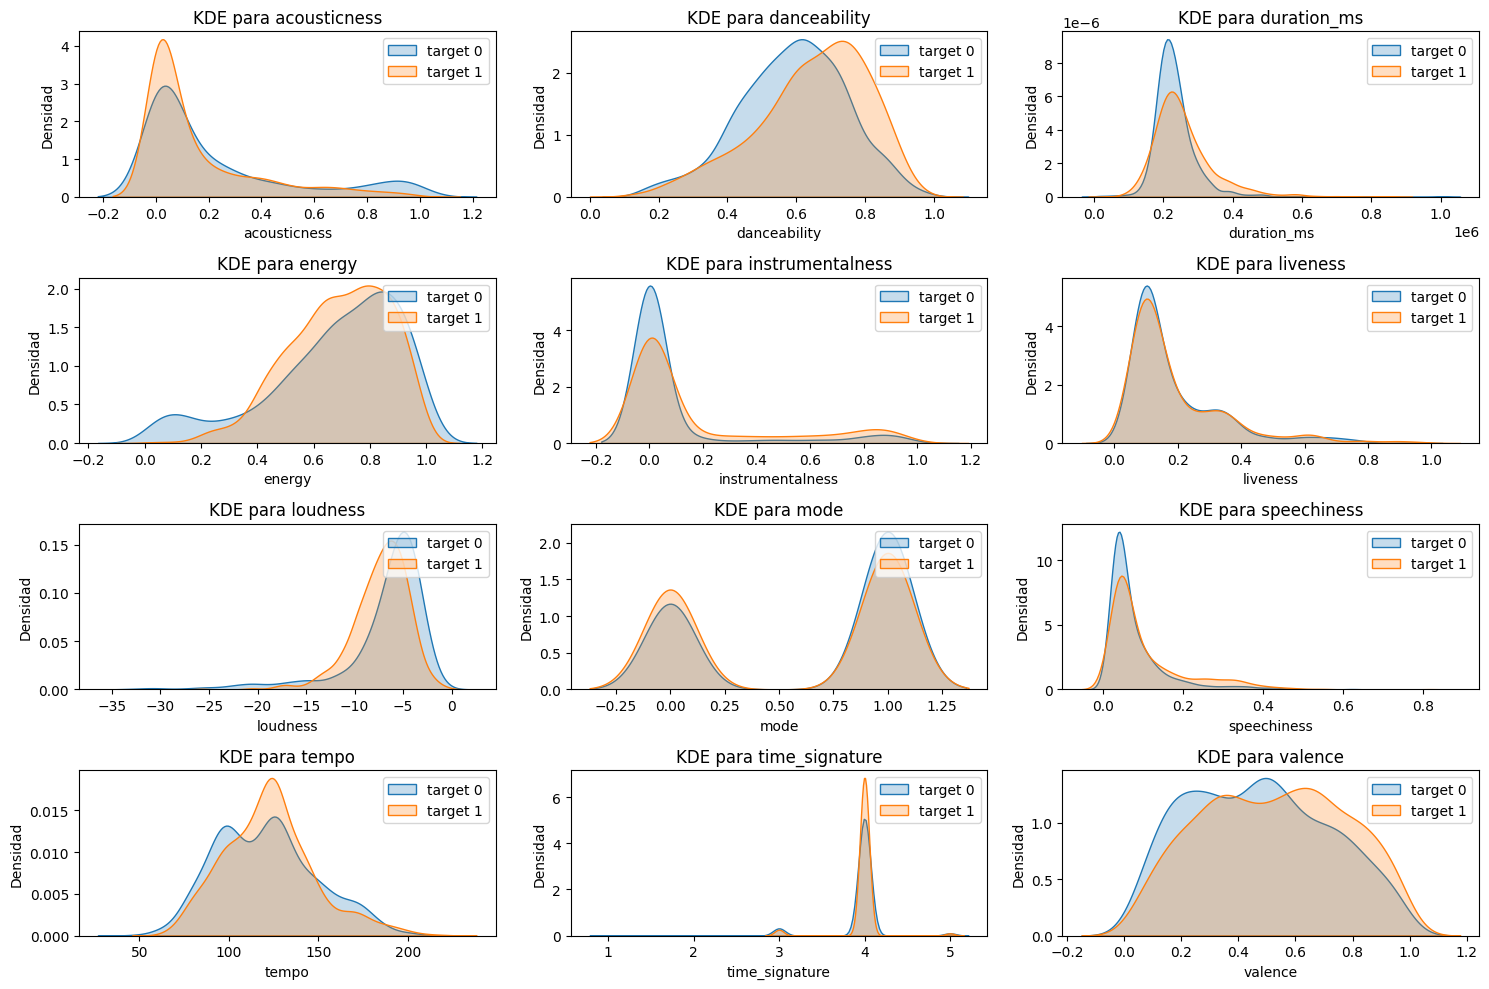

In [6]:
# Filtrar los datos para cada clase de 'target'
data_class_0 = data[data['target'] == 0]
data_class_1 = data[data['target'] == 1]

# Lista de características
features = ['acousticness',	'danceability',	'duration_ms',	'energy',	'instrumentalness', 'liveness',	'loudness',	'mode',	'speechiness',	'tempo',	'time_signature',	'valence']

# Crear subgráficos para cada característica
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(data_class_0[feature], label='target 0', shade=True)
    sns.kdeplot(data_class_1[feature], label='target 1', shade=True)
    plt.title(f'KDE para {feature}')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
plt.show()

##Estandarización de las características:

Originalmente se utilizaron las características:
Danceability (Bailabilidad): Esta característica puede ser relevante para muchas personas, especialmente aquellas que disfrutan de la música bailable. Una canción con una alta puntuación de bailabilidad puede ser más atractiva para aquellos que buscan música para moverse y bailar.

Energy (Energía): La energía de una canción, que se relaciona con la intensidad y actividad, suele ser un factor importante para las preferencias musicales. Las personas que buscan música enérgica pueden disfrutar de canciones con una alta puntuación de energía.

Valence (Valencia): La valencia se relaciona con la positividad musical transmitida por una canción. Las canciones con alta valencia suelen hacer que las personas se sientan felices y alegres. Por lo tanto, esta característica es relevante para aquellos que buscan canciones con un ambiente positivo.

Tempo: El ritmo o tempo de una canción puede influir en las preferencias. Algunas personas prefieren canciones más rápidas, mientras que otras disfrutan de ritmos más lentos. El tempo puede tener un impacto significativo en la percepción de una canción.

Instrumentalness (Instrumentalidad): Para aquellos que prefieren música instrumental, esta característica es relevante. Una alta puntuación de instrumentalidad indica que la canción no contiene voces, lo que puede ser atractivo para quienes disfrutan de la música sin letras.

Luego se fueron probando distintas características para mejorar los scores, ya que por ejemplo al utilizar 'tempo' el rendimiento de las métricas bajaba mucho su valor.


In [7]:
# Definir características (X) y etiquetas (y)
X = data[['valence','loudness', 'energy', 'danceability', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']].to_numpy()
y = data['target'].to_numpy()

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)
# Definir características (X) y etiquetas (y)
X = X_standardized
y = data['target'].to_numpy()


## Se dividen los datos de entrenamiento y prueba

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# K-Nearest Neighbors (KNN)


### Se busca el mejor K utilizando GridSearch

In [9]:
# Definir una cuadrícula de valores para n_neighbors
param_grid = {'n_neighbors': range(1, 11)}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='precision', cv=10)

# Ajustar el modelo a los datos de entrenamiento con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Encontrar el mejor valor para n_neighbors
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Encontrar el mejor modelo
best_model = grid_search.best_estimator_

# Utilizar el mejor modelo para hacer predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

## Función para generar el valor de K

In [10]:
def generate_clf_KNN(k, X_train, y_train):
    clasificadorKNN = KNeighborsClassifier(n_neighbors=k)
    clasificadorKNN.fit(X_train, y_train.ravel())
    return clasificadorKNN

##Se genera el valor de K para el modelo

In [11]:
# Generar un clasificador KNN
clasificadorKNN = generate_clf_KNN(best_n_neighbors, X_train, y_train)


##Se realizan las predicciones

In [12]:
# Realizar predicciones en el conjunto de prueba
y_pred = clasificadorKNN.predict(X_test)

##Matriz de confusión

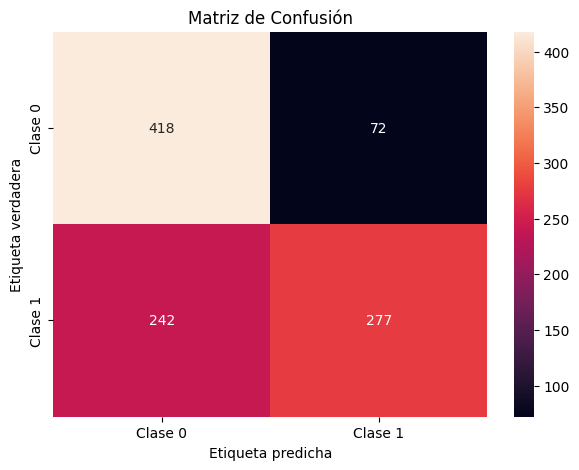

In [13]:
# Calcular la matriz de confusión
c = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

##Validación Cruzada

In [14]:
# Realizar validación cruzada (cross-validation) para evaluar el rendimiento del clasificador KNN
scores = cross_val_score(clasificadorKNN, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())


Scores de validación cruzada: [0.72277228 0.58910891 0.74257426 0.65841584 0.58415842 0.69306931
 0.63861386 0.59701493 0.73631841 0.68159204]
Media de los scores: 0.6643638244421456
Desviación estándar de los scores: 0.05758230656071963


##Validación cruzada usando K-fold

In [15]:
# Definir una estrategia de validación cruzada KFold con 5 divisiones y barajado de los datos
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizar validación cruzada utilizando la estrategia KFold para evaluar el rendimiento del clasificador KNN
scores = cross_val_score(clasificadorKNN, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.6980198  0.69554455 0.69478908 0.70471464 0.67245658]
Media de los scores: 0.6931049308404786
Desviación estándar de los scores: 0.01090031200066561


## Calcular métricas

In [16]:
# Calcular la precisión, recall y F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)


Precisión: 0.7936962750716332
Recall: 0.5337186897880539
F1-score: 0.6382488479262672
Exactitud 0.688800792864222


## Mostrar la curva de aprendizaje del modelo

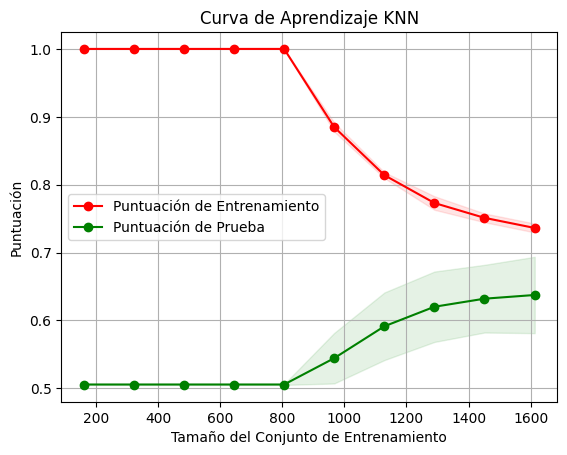

In [17]:


# Definir modelo
model = clasificadorKNN

# Crear curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcula la media y la desviación estándar de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica las curvas de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje KNN")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()


# Support Vector Machines (SVM)


### Crear un conjunto de hiperparámetros para realizar una búsqueda en cuadrícula (grid search) y encontrar la mejor combinación de valores para los hiperparámetros C y gamma del modelo SVM.

In [18]:
C = [0.1, 1, 10, 100]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]

hyperparameters = dict(C=C,
                      gamma=gamma)

print(hyperparameters)

{'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}


### Buscar la mejor combinación de hiperparámetros

In [19]:
best_model = GridSearchCV(estimator=SVC(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=7,
                         verbose=2)


best_model = best_model.fit(X_train,y_train)

Fitting 7 folds for each of 24 candidates, totalling 168 fits


### Mostrar los valores óptimos de los hiperparámetros C y gamma que se encontraron durante la búsqueda en cuadrícula

In [20]:
C = best_model.best_estimator_.get_params()['C']
gamma = best_model.best_estimator_.get_params()['gamma']

print(f'Best C: {C}')
print(f'Best gamma: {gamma}')


Best C: 100
Best gamma: 0.01


### Crear el modelo

In [21]:
support_vector_machine = SVC(kernel='rbf', C=C,
                             gamma=gamma)

support_vector_machine.fit(X_train, y_train)

y_pred = support_vector_machine.predict(X_test)

### Matríz de confusión

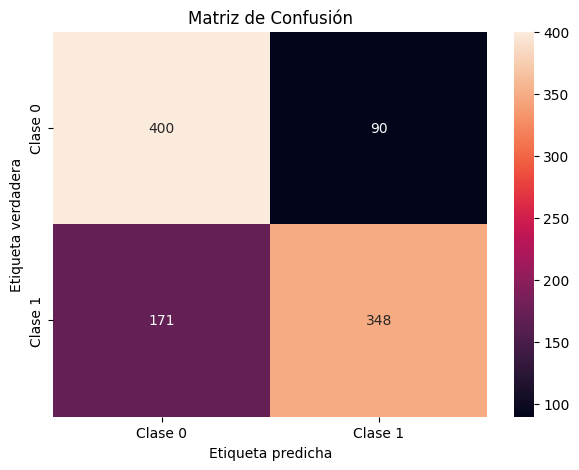

In [22]:
c = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

### Métricas


In [23]:
scores = cross_val_score(support_vector_machine, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.7970297  0.6980198  0.76237624 0.6980198  0.66831683 0.6980198
 0.73762376 0.64179104 0.76616915 0.70149254]
Media de los scores: 0.7168858676912467
Desviación estándar de los scores: 0.0454469298319658


In [24]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(support_vector_machine, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.7450495  0.73762376 0.74193548 0.74193548 0.70719603]
Media de los scores: 0.7347480529690686
Desviación estándar de los scores: 0.013977281033544847


In [25]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)

Precisión: 0.7945205479452054
Recall: 0.6705202312138728
F1-score: 0.7272727272727273
Exactitud 0.7413280475718533


### Curva de aprendizaje

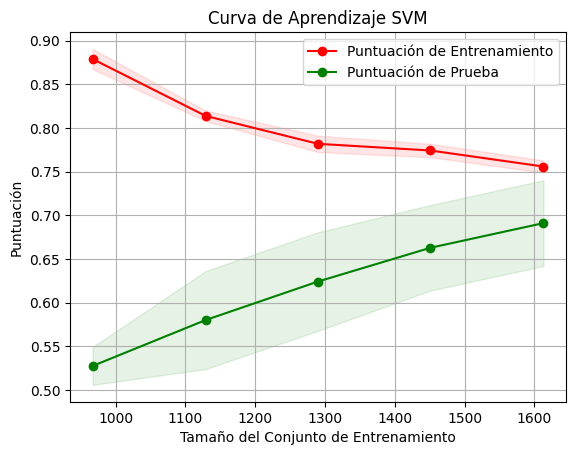

In [26]:
model = support_vector_machine


train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.title("Curva de Aprendizaje SVM")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

# Decision Tree (DT)


### Crear un diccionario con los diferentes combinaciones de hiperparámetros

In [27]:
criterio = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [2, 3, 5, 10, 20]
min_samples_leaf = [5, 10, 20, 50, 100]



hyperparameters = dict(criterion=criterio, splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

print(hyperparameters)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100]}


### Buscar el mejor modelo

In [28]:
best_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=7,
                         verbose=2)


best_model = best_model.fit(X_train,y_train)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


### Mostrar los mejores hiperparámetros encontrados

In [29]:
criterio = best_model.best_estimator_.get_params()['criterion']
splitter = best_model.best_estimator_.get_params()['splitter']
max_depth = best_model.best_estimator_.get_params()['max_depth']
min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']

print(f'Best criterio: {criterio}')
print(f'Best splitter: {splitter}')
print(f'Best max_depth: {max_depth}')
print(f'Best min_samples_leaf: {min_samples_leaf}')

Best criterio: gini
Best splitter: best
Best max_depth: 5
Best min_samples_leaf: 50


### Crear el modelo

In [30]:
decision_tree = DecisionTreeClassifier(criterion=criterio,
                                       splitter=splitter,
                                       max_depth=max_depth,
                                       min_samples_leaf=min_samples_leaf)


decision_tree.fit(X_train, y_train)


y_pred_tree = decision_tree.predict(X_test)

### Matriz de confusión

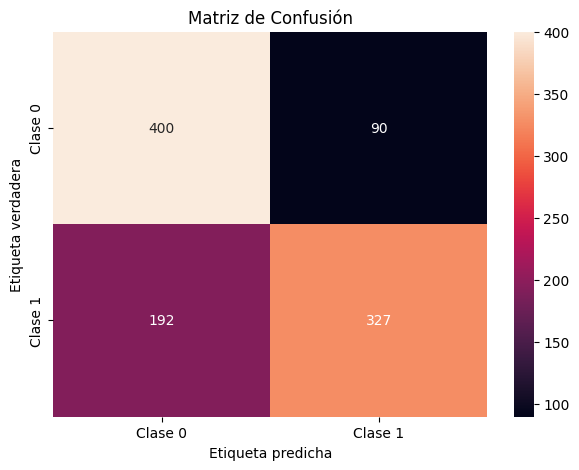

In [31]:
# Calcular la matriz de confusión
c = confusion_matrix(y_test, y_pred_tree)

# Visualizar la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

### Metricas

In [32]:
scores = cross_val_score(decision_tree, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.76732673 0.67821782 0.73267327 0.67326733 0.66831683 0.48019802
 0.63861386 0.58706468 0.73631841 0.62686567]
Media de los scores: 0.6588862617605044
Desviación estándar de los scores: 0.07898934826559209


In [33]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(decision_tree, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.70792079 0.74752475 0.6898263  0.7369727  0.71712159]
Media de los scores: 0.7198732280175909
Desviación estándar de los scores: 0.020543850050891953


In [34]:
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
accuracy = accuracy_score(y_test, y_pred_tree)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)

Precisión: 0.7841726618705036
Recall: 0.630057803468208
F1-score: 0.6987179487179487
Exactitud 0.7205153617443013


### Curva de Aprendizaje del modelo

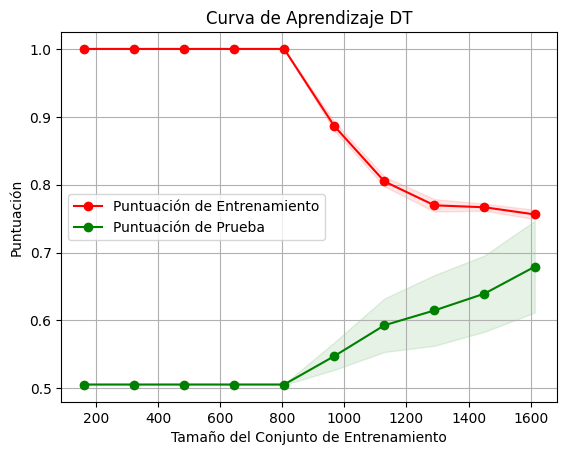

In [35]:

model = decision_tree


train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.title("Curva de Aprendizaje DT")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

# Random Forest (RF)

### Se crea un diccionario con hiperparametros

In [36]:
n_estimators = [200,  1000]
max_depth = [20,40]
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]



hyperparameters = dict(n_estimators=n_estimators,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf)


print(hyperparameters)

{'n_estimators': [200, 1000], 'max_depth': [20, 40], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}


### Buscar el mejor modelo

In [37]:
best_model = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=5,
                         verbose=2)


best_model = best_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [38]:
n_estimators = best_model.best_estimator_.get_params()['n_estimators']
max_depth = best_model.best_estimator_.get_params()['max_depth']
min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']


print(f'Best n_estimators: {n_estimators}')
print(f'Best max_depth: {max_depth}')
print(f'Best min_samples_split: {min_samples_split}')
print(f'Best min_samples_leaf: {min_samples_leaf}')


Best n_estimators: 200
Best max_depth: 20
Best min_samples_split: 10
Best min_samples_leaf: 4


###Crear el modelo

In [39]:
random_forest = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf)



random_forest.fit(X_train, y_train)


y_pred_rf = random_forest.predict(X_test)

###Matriz de confusión

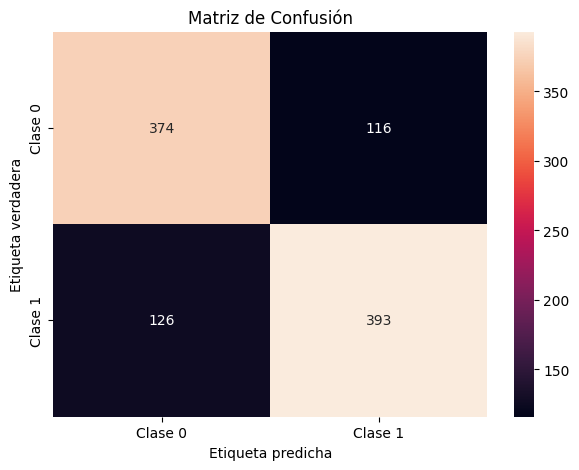

In [40]:
c = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

###Métricas

In [41]:
scores = cross_val_score(random_forest, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.8019802  0.6980198  0.83168317 0.71287129 0.70792079 0.65841584
 0.70792079 0.75124378 0.75621891 0.66666667]
Media de los scores: 0.7292941234421949
Desviación estándar de los scores: 0.05299138968756434


In [42]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(random_forest, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.7450495  0.78712871 0.74441687 0.7617866  0.77171216]
Media de los scores: 0.762018770115225
Desviación estándar de los scores: 0.016262273142379175


In [43]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)

Precisión: 0.7721021611001965
Recall: 0.7572254335260116
F1-score: 0.7645914396887159
Exactitud 0.7601585728444004


### Curva de Aprendizaje

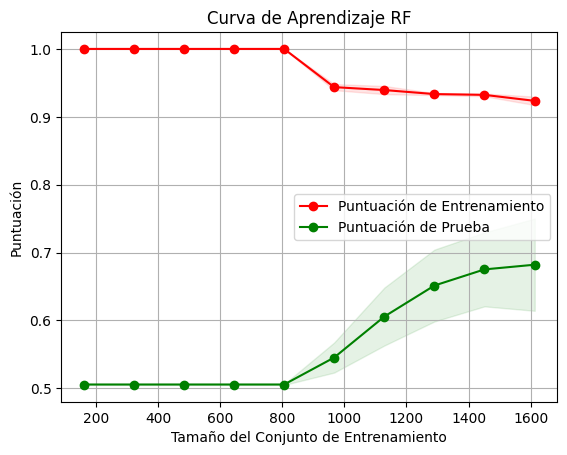

In [44]:
model = random_forest


train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.title("Curva de Aprendizaje RF")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

# NAIVE BAYES (NB)

### Hiperparámetro

In [45]:
var_smoothing = np.logspace(10,-5, num=400)


hyperparameters = dict(var_smoothing=var_smoothing)

### Buscar el mejor modelo

In [46]:
best_model = GridSearchCV(estimator=GaussianNB(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=5,
                         verbose=2)

best_model = best_model.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


###Obtener el valor óptimo del hiperparámetro

In [47]:
var_smoothing = best_model.best_estimator_.get_params()['var_smoothing']

print(f'Best var_smoothing: {var_smoothing}')

Best var_smoothing: 0.19306977288832536


### Crear el modelo

In [48]:
naive_bayes = GaussianNB(var_smoothing=var_smoothing)

naive_bayes.fit(X_train, y_train)

y_pred_nb = naive_bayes.predict(X_test)

### Matriz de Confusión

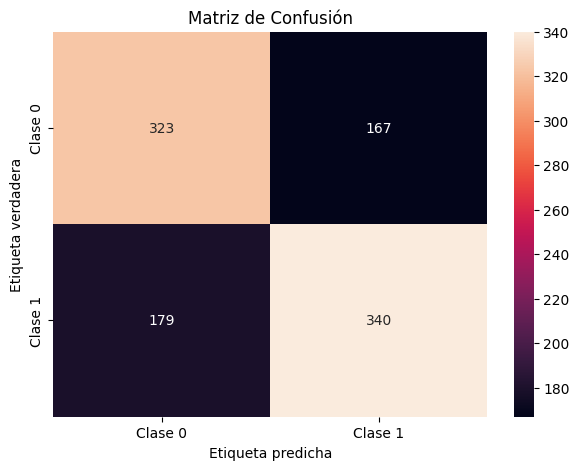

In [49]:
c = confusion_matrix(y_test, y_pred_nb)


plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

###Métricas

In [50]:
scores = cross_val_score(naive_bayes, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.53465347 0.46534653 0.66336634 0.63366337 0.59405941 0.33168317
 0.69306931 0.50248756 0.56218905 0.55223881]
Media de los scores: 0.5532757007043989
Desviación estándar de los scores: 0.09981443893855782


In [51]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(naive_bayes, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.63118812 0.66089109 0.60049628 0.63275434 0.617866  ]
Media de los scores: 0.6286391666461931
Desviación estándar de los scores: 0.019858003576331325


In [52]:
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)

Precisión: 0.6706114398422091
Recall: 0.6551059730250481
F1-score: 0.7645914396887159
Exactitud 0.6570862239841427


### Curva de Aprendizaje

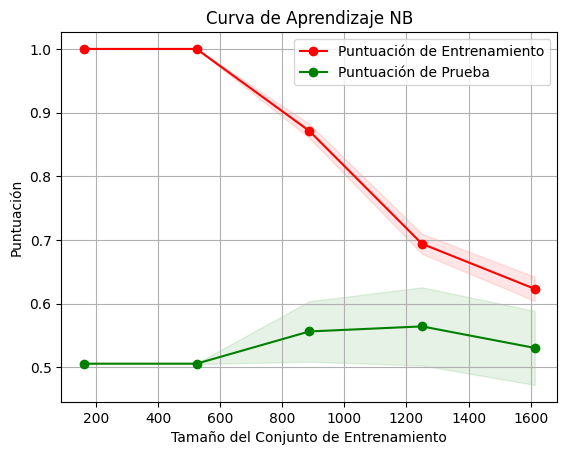

In [53]:
model = naive_bayes

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje NB")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

# ENSAMBLE

###Crear el modelo

In [54]:
# Crear un ensamblaje de modelos por votación mayoritaria
voting_classifier = VotingClassifier(estimators=[
    ('knn', clasificadorKNN),
    ('svm', support_vector_machine),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('naive_bayes', naive_bayes)
], voting='hard')

# Ajustar el ensamblaje a los datos de entrenamiento
voting_classifier.fit(X_train, y_train)

# Realizar predicciones con el ensamblaje
y_pred_ensemble = voting_classifier.predict(X_test)


### Matriz de confusión

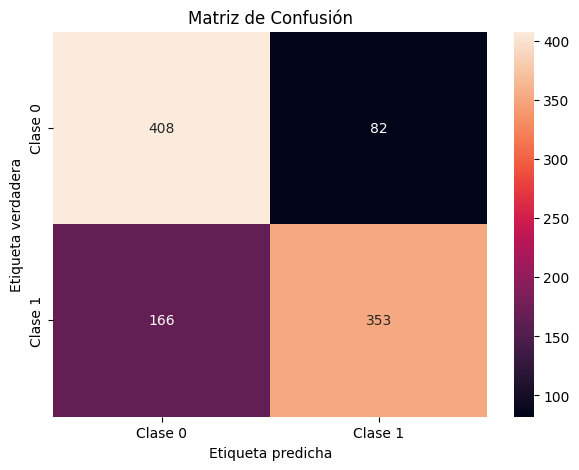

In [55]:
c = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(7, 5))
sns.heatmap(c, annot=True, fmt='g', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

### Métricas

In [56]:
scores = cross_val_score(voting_classifier, X, y.ravel(), cv=10)
print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.80693069 0.6980198  0.77722772 0.71287129 0.67326733 0.60891089
 0.74752475 0.64179104 0.75621891 0.68656716]
Media de los scores: 0.7109329589675386
Desviación estándar de los scores: 0.0586279303255557


In [57]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(voting_classifier, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.75       0.75742574 0.73200993 0.7617866  0.75434243]
Media de los scores: 0.7511129400781269
Desviación estándar de los scores: 0.010299241894175672


In [58]:
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Exactitud", accuracy)

Precisión: 0.8114942528735632
Recall: 0.6801541425818882
F1-score: 0.7400419287211739
Exactitud 0.7542120911793855


### Curva de Aprendizaje

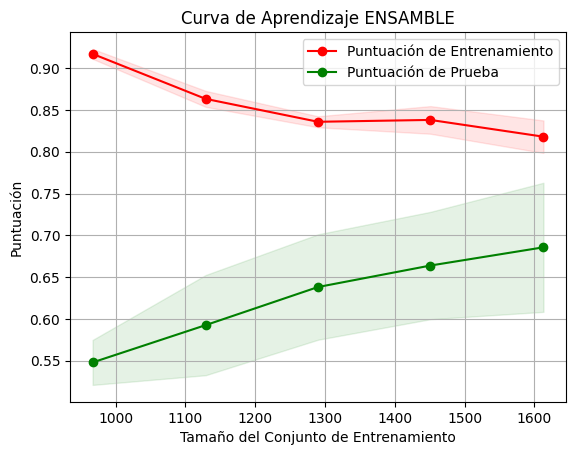

In [59]:
model = voting_classifier

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje ENSAMBLE")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")

plt.legend(loc="best")
plt.show()

#Conclusión

El código presentado es un ejemplo de clasificación de canciones de Spotify utilizando varios algoritmos de aprendizaje automático, como K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Decision Tree, Random Forest y Naive Bayes.

Se comienza con la visualización y exploración de las características del conjunto de datos, seguido por la estandarización de las características para garantizar una comparación justa entre los modelos.

Luego, se implementan varios modelos de clasificación y se ajustan a los datos de entrenamiento. Cada modelo se sintoniza mediante búsqueda de hiperparámetros para obtener el mejor rendimiento posible. Se evalúan los modelos utilizando matrices de confusión y diversas métricas, como precisión, recall, F1-score y exactitud. Además, se utilizan curvas de aprendizaje para evaluar el rendimiento de los modelos en función del tamaño del conjunto de entrenamiento.

Los resultados muestran que el ensamblaje de modelos por votación mayoritaria (Voting Classifier) obtiene un buen equilibrio entre las métricas de rendimiento. El modelo de ensamblaje combina varios modelos individuales para tomar decisiones conjuntas y logra una precisión de aproximadamente 80% y un F1-score de alrededor del 73%.

La evaluación de los diferentes modelos de clasificación implementados revela variaciones significativas en su rendimiento, lo que ofrece una visión valiosa de cómo cada modelo aborda la tarea de clasificación de canciones de Spotify.

A continuación, se presentan las comparaciones y diferencias clave entre los modelos:

El modelo de Random Forest demuestra un buen rendimiento, con un F1-score y precisión cercanos al 76% y un recall del 75%, lo que lo convierte en una elección sólida.

SVM muestra un equilibrio entre precisión y recall, lo que resulta en un F1-score razonable del 73%.

KNN y Decision Tree obtienen resultados aceptables, pero con un rendimiento más bajo en términos de precisión y recall.

Naive Bayes muestra la precisión más baja y una exactitud significativamente inferior a otros modelos, lo que sugiere que puede no ser la mejor opción para este conjunto de datos específico.

Random Forest logra un buen equilibrio entre precisión y recall, lo que puede ser beneficioso en situaciones en las que es importante minimizar tanto los falsos positivos como los falsos negativos.

El ensamblaje de modelos por votación mayoritaria demuestra lograr una alta precisión, pero con un cierto costo en recall, lo que significa que es eficaz para predecir canciones que cumplen con ciertos criterios pero puede perder algunas otras.
